In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.manifold import TSNE

# Paired comparison (within group)
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# Unpaired comparison (between group)
from scipy.stats import ttest_ind
from scipy.stats import ranksums

from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.anova import anova_lm

# %matplotlib inline 
# Display plots within Jupyter notebook


### Load example dataset

In [8]:
from sklearn.datasets import load_iris, load_diabetes
from scipy.stats import shapiro # Test if data follows Normal distribution

print('Loading iris dataset..\n')
data_iris = load_iris()

print('Target names: ', data_iris.target_names)
print('Feature names: ', data_iris.feature_names)

Loading iris dataset..

Target names:  ['setosa' 'versicolor' 'virginica']
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
X, y = data_iris.data, data_iris.target

X_class0 = X[y == 0]
X_class1 = X[y == 1]
X_class2 = X[y == 2]

### Display recuded feature map using t-SNE and PCA
t-SNE (t-distributed stochatic neighbor embedding); now look at UMAP (Uniform Manifold Approximation and Projection)
PCA (Principal component analysis)

Normality test on X
X: Statistics=0.876, p=0.000



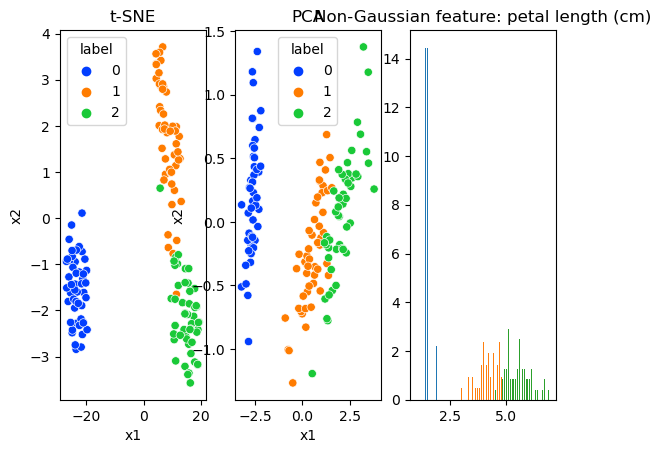

In [13]:
mdl = TSNE(n_components=2, random_state=0)
X_embedded = mdl.fit_transform(X)
fig, ax = plt.subplots(1, 3)
palette = sns.color_palette("bright", 3)
df_embedded = pd.DataFrame({'x1': X_embedded[:, 0], 'x2': X_embedded[:, 1], 'label': y})
sns.scatterplot(data=df_embedded, x='x1', y='x2',
                hue=df_embedded["label"], palette=palette, ax=ax[0], legend='full')
ax[0].set_title('t-SNE')

mdl2 = PCA(n_components=2)
X_embedded_PCA = mdl2.fit_transform(X)
palette = sns.color_palette("bright", 3)
df_embedded = pd.DataFrame({'x1': X_embedded_PCA[:, 0], 'x2': X_embedded_PCA[:, 1], 'label': y})
sns.scatterplot(data=df_embedded, x='x1', y='x2',
                hue=df_embedded["label"], palette=palette, ax=ax[1], legend='full')
ax[1].set_title('PCA')

# Display non-Gaussian distribution (or Gausssian mixture) regardless of target class
ax[2].hist(X_class0[:, 2], bins=50, density=True)    # plot the histogram
ax[2].hist(X_class1[:, 2], bins=50, density=True)    # plot the histogram
ax[2].hist(X_class2[:, 2], bins=50, density=True)    # plot the histogram

stat, p = shapiro(X[:, 2])
print('Normality test on X')
print('X: Statistics=%.3f, p=%.3f\n' % (stat, p)) # Non-Gaussian if p < 0.05
if p < 0.05:
    ax[2].set_title('Non-Gaussian feature: '+ data_iris.feature_names[2])
else:
    ax[2].set_title('Gaussian feature: '+ data_iris.feature_names[2])

### Figure

t-SNE and PCA succefully reduced data dimension from 4 to 2, and their scattor plots show that class 0, 1, and 2 are well separated, while class 0 is more distinct from class 1 and 2. We will cover t-SNE, UMAP, PCA later in this semester.

### Histogram & Normality test (Shapiro)

Histogram (class 0, 1, and 2) showed that all data combining all classes are non-Gaussian (Gaussian mixtures - each within class feature seems following Gaussian distribution), and null hypothesis is rejected with p < 0.05, indicating that it does not follow Gaussian distribution


### Compare two classes

Target: 'versicolor', 'virginica'
Feature: 'petal length (cm)'

Samples: 50 per class (target)

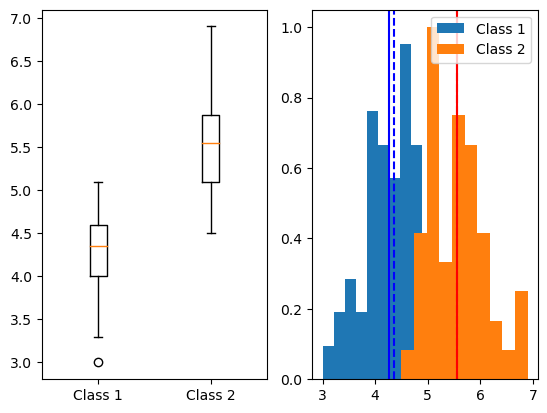

In [15]:
test_x1 = X_class1[:, 2]
test_x2 = X_class2[:, 2]

fig, ax = plt.subplots(1, 2)
ax[0].boxplot([test_x1, test_x2])
ax[0].set_xticklabels(['Class 1', 'Class 2'])

ax[1].hist(test_x1, density=True)    # plot the histogram
ax[1].hist(test_x2, density=True)    # plot the histogram
ax[1].legend(['Class 1', 'Class 2'])
ax[1].axvline(np.mean(test_x1), color='b') # Average
ax[1].axvline(np.median(test_x1), color='b', linestyle='--') # Median

ax[1].axvline(np.mean(test_x2), color='r') # Average
ax[1].axvline(np.median(test_x2), color='r', linestyle='--') # Median


For the selected feature, class 2 exhibits higher values in average. In terms of data distribution, class 1 and class 2 data seems following Gaussian distribution. (dotted line: median, solid line: average)

In [16]:
stat, p = shapiro(test_x1)
print('X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
stat, p = shapiro(test_x2)
print('X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

X1: Statistics=0.966, p=0.158
X2: Statistics=0.962, p=0.110


Shapiro test on class 1 and class 2 do not reject null hypothesis, so they are Gaussian with respect to shapiro test

### Applying various statistical tests
- Unpaired test: comparison between two groups (sample numbers can be different)
    - Unpaired Student's t-test; Gaussian
    - Ranksum test; non-Gaussian
- Paired test: comparison within group (sample numbers should be the same)
    - Paired Student's t-test; Gaussian
    - Wilcoxon's signed rank test; non-Gaussian

In [17]:
res_ttest_ind = ttest_ind(test_x1, test_x2) # diff. btw. two group 
print('Unpaired t-test')
print('p-val: ', res_ttest_ind.pvalue)
print('t-val: ', res_ttest_ind.statistic)

res_ttest_rel = ttest_rel(test_x1, test_x2) # average of diff.
print('Paired t-test')
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

res_wilcoxon_signed_rank = wilcoxon(test_x1, test_x2)
print('Wilcoxon signed rank test')
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

res_wilcoxon_ranksum = ranksums(test_x1, test_x2)
print('Wilcoxon rank sum test')         # Mann-Whitney U test
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

Unpaired t-test
p-val:  3.1788195478061495e-22
t-val:  -12.603779441384985
Paired t-test
p-val:  2.5623202280611684e-16
t-val:  -12.090563344949114
Wilcoxon signed rank test
p-val:  2.0099446980338513e-09
Wilcoxon rank sum test
p-val:  9.529977763570097e-17


In this example, comparing petal lengh of 'versicolor' and 'virginica' is unpaired comparison, and data follow Gaussian distribution.

Therefore, unpaired Student's t-test seems correct choice

### Simulating data deficiency

Let's select a part of data (e.g., 10 out of 50 samples), then perform the same analysis

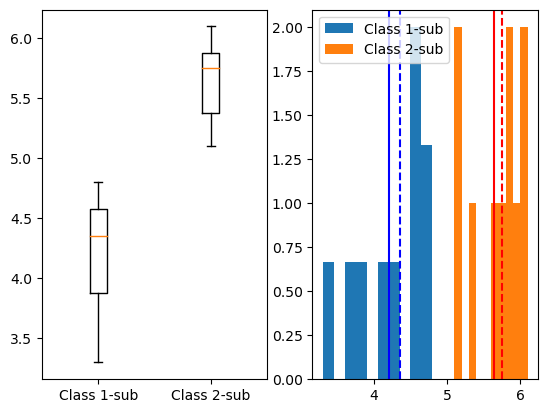

In [18]:
def choose_subsamples_rows(X_in, M, seed=None):
    np.random.seed(seed)
    indicies_sub = np.random.choice(X_in.shape[0], size=M, replace=False)
    return X_in[indicies_sub]

M = 10
X_class1_sub = choose_subsamples_rows(test_x1, M)
X_class2_sub = choose_subsamples_rows(test_x2, M)

fig, ax = plt.subplots(1, 2)
ax[0].boxplot([X_class1_sub, X_class2_sub])
ax[0].set_xticklabels(['Class 1-sub', 'Class 2-sub'])

ax[1].hist(X_class1_sub, density=True)    # plot the histogram
ax[1].hist(X_class2_sub, density=True)    # plot the histogram
ax[1].legend(['Class 1-sub', 'Class 2-sub'])
ax[1].axvline(np.mean(X_class1_sub), color='b') # Average
ax[1].axvline(np.median(X_class1_sub), color='b', linestyle='--') # Median

ax[1].axvline(np.mean(X_class2_sub), color='r') # Average
ax[1].axvline(np.median(X_class2_sub), color='r', linestyle='--') # Median

Selecting 10 subsamples showed the same trend (class 2 > class 1), but data distribution seems non-Gaussian

In [20]:
# Not reliable when data is not enough
stat, p = shapiro(X_class1_sub)
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
stat, p = shapiro(X_class2_sub)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

Shapiro test on X1: Statistics=0.925, p=0.400
Shapiro test on X2: Statistics=0.906, p=0.255


However, Shapiro test is not always reliable especially data is not enough. Be sure to check normality test and visually checking data distribution

In [21]:
res_ttest_ind = ttest_ind(X_class1_sub, X_class2_sub)
print('Unpaired t-test')
print('p-val: ', res_ttest_ind.pvalue)
print('t-val: ', res_ttest_ind.statistic)


res_ttest_rel = ttest_rel(X_class1_sub, X_class2_sub)
print('Paired t-test')
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

res_wilcoxon_signed_rank = wilcoxon(X_class1_sub, X_class2_sub)
print('Wilcoxon signed rank test')
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

res_wilcoxon_ranksum = ranksums(X_class1_sub, X_class2_sub)
print('Wilcoxon rank sum test')         # Mann-Whitney U test
print('p-val: ', res_wilcoxon_ranksum.pvalue) 


Unpaired t-test
p-val:  8.792071067187885e-07
t-val:  -7.30060754645462
Paired t-test
p-val:  5.489006730881503e-05
t-val:  -7.12923662905135
Wilcoxon signed rank test
p-val:  0.001953125
Wilcoxon rank sum test
p-val:  0.00015705228423075119


### Test with similar data

Previous example showed very distinct feature map between classes. Then let's split one class data into two parts; they should be similar

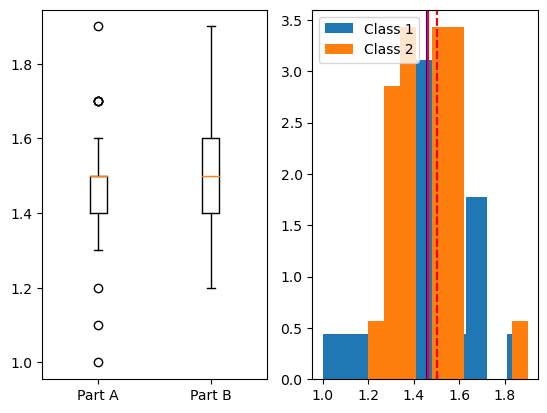

In [22]:
# Split the same class data into two groups - they should be similar
X_class1_splitA = X_class0[:25, :]
X_class1_splitB = X_class0[25:, :]

X_partA = X_class1_splitA[:, 2]
X_partB = X_class1_splitB[:, 2]

fig, ax = plt.subplots(1, 2)
ax[0].boxplot([X_partA, X_partB])
ax[0].set_xticklabels(['Part A', 'Part B'])

ax[1].hist(X_partA, density=True)    # plot the histogram
ax[1].hist(X_partB, density=True)    # plot the histogram
ax[1].legend(['Class 1', 'Class 2'])
ax[1].axvline(np.mean(X_partA), color='b') # Average
ax[1].axvline(np.median(X_partA), color='b', linestyle='--') # Median

ax[1].axvline(np.mean(X_partB), color='r') # Average
ax[1].axvline(np.median(X_partB), color='r', linestyle='--') # Median

For now, boxplot showed similar averages, and histrogram showed overlapping data distribution, while maintaining Gaussian-like distribution.

In [23]:
# Not reliable when data is not enough
stat, p = shapiro(X_partA)
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
stat, p = shapiro(X_partB)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

Shapiro test on X1: Statistics=0.950, p=0.251
Shapiro test on X2: Statistics=0.914, p=0.038


Class 2 (orange color in histrogram above) rejects null hypothesis, indicating it does not follow normal distribution

In [24]:
res_ttest_ind = ttest_ind(X_partA, X_partB)
print('Unpaired t-test')
print('p-val: ', res_ttest_ind.pvalue)
print('t-val: ', res_ttest_ind.statistic)

res_ttest_rel = ttest_rel(X_partA, X_partB)
print('Paired t-test')
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

res_wilcoxon_signed_rank = wilcoxon(X_partA, X_partB)
print('Wilcoxon signed rank test')
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

res_wilcoxon_ranksum = ranksums(X_partA, X_partB)
print('Wilcoxon rank sum test')         # Mann-Whitney U test
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

Unpaired t-test
p-val:  0.9360919429593118
t-val:  -0.08060410782434843
Paired t-test
p-val:  0.9314275194735182
t-val:  -0.08695652173913108
Wilcoxon signed rank test
p-val:  0.6942273651364446
Wilcoxon rank sum test
p-val:  0.9304228600674964


None of them showed statistical signficance, indicating they are not significantly different in statistical sense. 

Note that applying all possible statistical tests is not appropriate, but we are learning that inappropriate selection could lead to wrong insight, when some tests showed significance and you choose wrong statistical test. 

You must choose one correct statistical test!

### Test with similar data - not enough data

Let's split part of these similar data. By chance, some random choice exhibit statistical test by selecting only small part of the data. Therefore, you should be careful to rely on statistical test when your data is not enough.

Shapiro test on X1: Statistics=0.825, p=0.029
Shapiro test on X2: Statistics=0.907, p=0.258
Unpaired t-test
p-val:  0.017228597369342315
t-val:  2.6234238965856114
Paired t-test
p-val:  0.0176284334185427
t-val:  2.8988471703639473
Wilcoxon signed rank test
p-val:  0.04080536406696605
Wilcoxon rank sum test
p-val:  0.031209012771740218


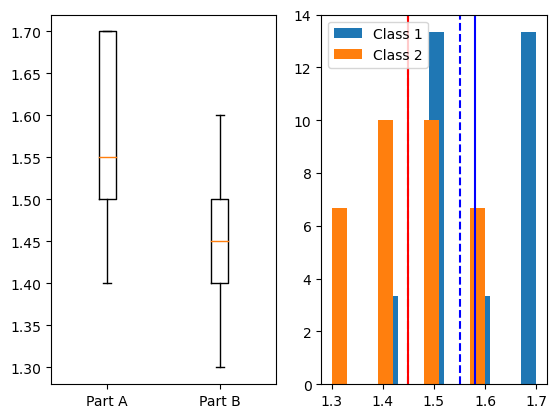

In [30]:
# Choose part of the data
# Run several times until it shows significant difference by chance
M = 10
X_partA_sub = choose_subsamples_rows(X_partA, M)
X_partB_sub = choose_subsamples_rows(X_partB, M)

fig, ax = plt.subplots(1, 2)
ax[0].boxplot([X_partA_sub, X_partB_sub])
ax[0].set_xticklabels(['Part A', 'Part B'])

ax[1].hist(X_partA_sub, density=True)    # plot the histogram
ax[1].hist(X_partB_sub, density=True)    # plot the histogram
ax[1].legend(['Class 1', 'Class 2'])
ax[1].axvline(np.mean(X_partA_sub), color='b') # Average
ax[1].axvline(np.median(X_partA_sub), color='b', linestyle='--') # Median

ax[1].axvline(np.mean(X_partB_sub), color='r') # Average
ax[1].axvline(np.median(X_partB_sub), color='r', linestyle='--') # Median

# Not reliable when data is not enough
stat, p = shapiro(X_partA_sub)
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
stat, p = shapiro(X_partB_sub)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

res_ttest_ind = ttest_ind(X_partA_sub, X_partB_sub)
print('Unpaired t-test')
print('p-val: ', res_ttest_ind.pvalue)
print('t-val: ', res_ttest_ind.statistic)

res_ttest_rel = ttest_rel(X_partA_sub, X_partB_sub)
print('Paired t-test')
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

res_wilcoxon_signed_rank = wilcoxon(X_partA_sub, X_partB_sub)
print('Wilcoxon signed rank test')
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

res_wilcoxon_ranksum = ranksums(X_partA_sub, X_partB_sub)
print('Wilcoxon rank sum test')         # Mann-Whitney U test
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

By chance, statistical tests showed statistical significance, even though they are from the same class data. 